# Testing API service

In [1]:
# %pip install fastapi

## Dataset for ML learning was taken from https://www.kaggle.com/competitions/hull-tactical-market-prediction/data

## Dataset preparation

In [2]:
import pandas as pd
import numpy as np

import json

import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('data/hull-tactical-market-prediction/train.csv')

In [4]:
train_df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [5]:
train_df.shape

(8990, 98)

In [6]:
train_df.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,...,7984.000000,7984.000000,7478.000000,7984.000000,7479.000000,7984.000000,4451.000000,8990.000000,8990.000000,8990.000000
mean,4494.500000,0.031591,0.031591,0.047831,0.575195,0.190656,-0.238042,0.045717,0.142825,0.143159,...,0.489553,0.506930,0.372494,0.287179,0.148270,0.303908,0.129227,0.000469,0.000107,0.000051
std,2595.333794,0.174917,0.174917,0.213420,0.494341,0.392840,0.425909,0.208883,0.349914,0.350254,...,0.306230,0.306554,1.153280,0.312238,1.326879,0.351109,1.277273,0.010551,0.000088,0.010568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000661,0.000661,-2.723527,0.000661,-2.027551,0.000661,-1.497420,-0.039754,-0.000004,-0.040582
25%,2247.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.207011,0.236111,-0.472864,0.000661,-0.797168,0.000661,-0.738242,-0.004324,0.000008,-0.004759
50%,4494.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.492394,0.519180,0.275162,0.180225,-0.097670,0.101025,-0.170825,0.000659,0.000095,0.000252
75%,6741.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.760582,0.772487,1.125069,0.515873,0.795763,0.590030,0.685907,0.005900,0.000193,0.005479
max,8989.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6.809912,1.000000,12.678264,1.000000,12.997536,0.040661,0.000317,0.040551


In [7]:
train_df = train_df[1:]

In [8]:
y_regression = 'market_forward_excess_returns'
y_classification = 'market_forward_excess_returns_classes'

y_features = [y_regression, y_classification]

<Axes: >

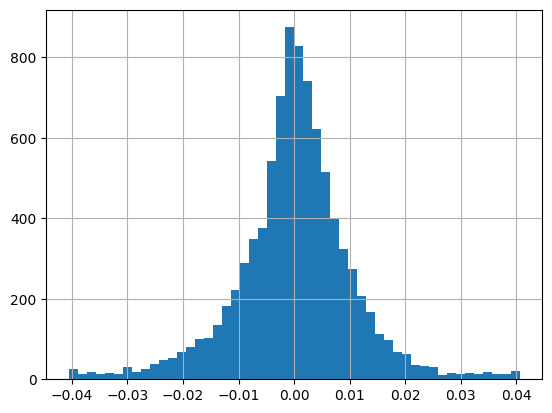

In [9]:
train_df[y_regression].hist(bins=50)

In [10]:
train_df[y_classification] = train_df[y_regression].apply(lambda x: x > 0)

## ML Models

In [11]:
import lightgbm as lgb

In [12]:
hyperparameters_regression = {
    "boosting_type": "gbdt",        # 'gbdt', 'dart', 'goss', 'rf'
    "num_leaves": 31,               # int, максимальное число листьев в дереве
    "max_depth": 20,                # int, максимальная глубина дерева (-1 = не ограничено)
    "learning_rate": 0.1,           # float, темп обучения
    "n_estimators": 100,            # int, число деревьев (итераций бустинга)
    "subsample_for_bin": 200000,    # int, размер выборки для построения гистограмм
    "objective": "regression",      # str, целевая функция (regression, mse, rmse и др.)
    "min_split_gain": 0.0,          # float, минимальный прирост для расщепления
    "min_child_weight": 0.001,      # float, минимальный "вес" в дочернем узле
    "min_child_samples": 20,        # int, минимальное количество объектов в листе
    "subsample": 1.0,               # float, доля выборки для использования в каждом дереве
    "colsample_bytree": 1.0,        # float, доля признаков для каждого дерева
    "reg_alpha": 0.0,               # float, L1-регуляризация
    "reg_lambda": 0.0,              # float, L2-регуляризация
    "random_state": None,           # int, seed для генератора случайных чисел
    "verbose": -1                   # int, уровень вывода, -1 = silence
}


regression_model = lgb.LGBMRegressor(**hyperparameters_regression)

In [13]:
new_ger = regression_model

In [14]:
X_train = train_df.drop(y_features, axis=1)
Y_train = train_df[y_regression]

Y_classification = train_df[y_classification]

In [15]:
regression_model.fit(X_train, Y_train)

LGBMRegressor(max_depth=20, objective='regression', verbose=-1)

In [16]:
y_pred = regression_model.predict(X_train)

In [17]:
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
mean_absolute_percentage_error(Y_train, y_pred)

0.0247576503901781

In [ ]:
X_train.to_csv('Train_X.csv')

Y_classification.to_csv('Y_classification.csv', index=True)
Y_train.to_csv('Y_train.csv', index=True)

## Testing Fast API

In [19]:
import requests

In [20]:
hyperparameters_regression = {
    "boosting_type": "gbdt",        # 'gbdt', 'dart', 'goss', 'rf'
    "num_leaves": 31,               # int, максимальное число листьев в дереве
    "max_depth": 20,                # int, максимальная глубина дерева (-1 = не ограничено)
    "learning_rate": 0.1,           # float, темп обучения
    "n_estimators": 100,            # int, число деревьев (итераций бустинга)
    "subsample_for_bin": 200000,    # int, размер выборки для построения гистограмм
    "objective": "regression",      # str, целевая функция (regression, mse, rmse и др.)
    "min_split_gain": 0.0,          # float, минимальный прирост для расщепления
    "min_child_weight": 0.001,      # float, минимальный "вес" в дочернем узле
    "min_child_samples": 20,        # int, минимальное количество объектов в листе
    "subsample": 1.0,               # float, доля выборки для использования в каждом дереве
    "colsample_bytree": 1.0,        # float, доля признаков для каждого дерева
    "reg_alpha": 0.0,               # float, L1-регуляризация
    "reg_lambda": 0.0,              # float, L2-регуляризация
    "random_state": 20,             # int, seed для генератора случайных чисел
    "verbose": -1                   # int, уровень вывода, -1 = silence
}

hyperparameters_regression_small = {
    "boosting_type": "gbdt",        # 'gbdt', 'dart', 'goss', 'rf'
    "num_leaves": 5,                # int, максимальное число листьев в дереве
    "max_depth": 4,                 # int, максимальная глубина дерева (-1 = не ограничено)
    "learning_rate": 0.1,           # float, темп обучения
    "n_estimators": 4,              # int, число деревьев (итераций бустинга)
    "subsample_for_bin": 20,        # int, размер выборки для построения гистограмм
    "objective": "mse",             # str, целевая функция (regression, mse, rmse и др.)
    "random_state": 99,             # int, seed для генератора случайных чисел
    "verbose": -1                   # int, уровень вывода, -1 = silence
}

hyperparameters_classifier = {
    "boosting_type": "gbdt",       # Тип бустинга (град бустинг, dart, goss, rf)
    "num_leaves": 31,              # Максимальное число листьев в одном дереве
    "max_depth": -1,               # Максимальная глубина дерева (-1 — без ограничения)
    "learning_rate": 0.1,          # Темп обучения
    "n_estimators": 100,           # Количество деревьев
    "subsample_for_bin": 200000,   # Размер выборки для построения гистограмм
    "objective": "binary",         # Целевая функция (например, binary для классификации)
    "min_split_gain": 0.0,         # Минимальный прирост для расщепления
    "min_child_weight": 0.001,     # Минимальный вес в дочернем узле
    "min_child_samples": 20,       # Минимальное число объектов в листе
    "subsample": 1.0,              # Доля выборки для подвыборки каждого дерева
    "colsample_bytree": 1.0,       # Доля признаков для каждого дерева
    "reg_alpha": 0.0,              # L1 регуляризация
    "reg_lambda": 0.0,             # L2 регуляризация
    "random_state": None,          # Случайное зерно
    "verbose": -1                  # Уровень вывода (отключен)
}

In [39]:
# Задание 2 - получить список доступных моделей

data = {
}

z = requests.get("http://127.0.0.1:8000/get_model_classes", json=data)
json.loads(z.text)['model_classes']

['LGBMRegressor', 'LGBMClassifier']

In [22]:
# Задание 1 - обучать модели с возможностью выбора гиперпараметров. 
data = {
    "model_type": 'LGBMClassifier',
    "hyperparameters": hyperparameters_classifier,
    "X_data": X_train.to_json(orient='records'),
    "Y_data": Y_classification.to_json(orient='records')
}

z = requests.post("http://127.0.0.1:8000/train_new_model", json=data)
print(z.text)


# Задание 3 - вернуть предсказание модели
data = {
    "model_id": 0,
    "X_data": X_train.to_json(orient='records')
}

z = requests.post("http://127.0.0.1:8000/predict", json=data)
preds = json.loads(z.text)['prediction']
print(preds[:5])

# Задание 4.1 - переобучить модель по айди
data = {
    "model_id": 0,
    "X_data": X_train[:20].to_json(orient='records'),
    "Y_data": Y_classification[:20].to_json(orient='records')
}
z = requests.post("http://127.0.0.1:8000/train_model", json=data)
print(z.text)

# Задание 4.2 - удалить модель
z = requests.delete("http://127.0.0.1:8000/delete_model/0")
print(z.text)

# Задание 5 - проверка статуса сервиса
z = requests.get("http://127.0.0.1:8000/healthcheck")
print(z.text)

{"model_id":0,"status":"trained","train metric":"ROC AUC: 1.0"}
[False, False, True, False, False]
{"model_id":0.0,"status":"trained","train metric":"ROC AUC: 0.5"}
{"status":"success","result":"Model 0 and its hyperparameters were deleted"}
{"status":"ok","model_count":0}


In [28]:
data = {
    "model_type": 'LGBMRegressor',
    "hyperparameters": hyperparameters_regression
}

z = requests.post("http://127.0.0.1:8000/create_model", json=data)
z.text

'{"model_id":3,"model_class":"LGBMRegressor","hyperparameters":{"boosting_type":"gbdt","num_leaves":31,"max_depth":20,"learning_rate":0.1,"n_estimators":100,"subsample_for_bin":200000,"objective":"regression","min_split_gain":0.0,"min_child_weight":0.001,"min_child_samples":20,"subsample":1.0,"colsample_bytree":1.0,"reg_alpha":0.0,"reg_lambda":0.0,"random_state":20,"verbose":-1}}'

In [29]:
data = {
    "model_type": 'LGBMRegressor',
    "hyperparameters": hyperparameters_regression_small
}

z = requests.post("http://127.0.0.1:8000/create_model", json=data)
z.text

'{"model_id":4,"model_class":"LGBMRegressor","hyperparameters":{"boosting_type":"gbdt","num_leaves":5,"max_depth":4,"learning_rate":0.1,"n_estimators":4,"subsample_for_bin":20,"objective":"mse","random_state":99,"verbose":-1}}'

In [30]:
data = {
    "model_id": 1,
    "X_data": X_train.to_json(orient='records'),
    "Y_data": Y_train.to_json(orient='records')
}
z = requests.post("http://127.0.0.1:8000/train_model", json=data)
print(z.text)

data = {
    "model_id": 2,
    "X_data": X_train.to_json(orient='records'),
    "Y_data": Y_train.to_json(orient='records')
}
z = requests.post("http://127.0.0.1:8000/train_model", json=data)
print(z.text)

{"model_id":1.0,"status":"trained","train metric":"MAPE: 0.02475756283598709"}
{"model_id":2.0,"status":"trained","train metric":"MAPE: 1.0897456022567076"}


In [31]:
data = {
    "model_id": 1,
    "X_data": X_train.to_json(orient='records')
}
z_0 = requests.post("http://127.0.0.1:8000/predict", json=data)
print(z_0.text)

data = {
    "model_id": 2,
    "X_data": X_train.to_json(orient='records')
}
z_1 = requests.post("http://127.0.0.1:8000/predict", json=data)
print(z_1.text)

{"model_id":1.0,"prediction":[-0.009144078346512078,-0.010288599279938457,0.004071157066050757,-0.012156777486446018,-0.007118956929905689,0.0029987906786896365,-0.0252042341931828,-0.009144078346512078,0.010722481494853438,-0.010288599279938457,0.0018579543311538782,0.0023599748091331445,-0.02677632359765184,0.003188731617166863,-0.004495726948679986,-0.013135211598547001,-0.0013110950021834743,-0.0023171695128134484,-0.00730046105209068,0.01824412684126193,-0.0013104271167166737,0.00586362498406647,0.0023599748091331445,-0.007118956929905689,0.011967023231946615,-0.0028771369895614777,0.001500529596984465,-0.01097607182050987,0.0024097788800061075,0.0024569729084656677,0.00815574373397387,-0.006943188093898543,-0.01479940489115979,-0.001453155930313964,-0.006460264046292256,-0.0052775289140858375,0.013318657870772747,0.00432634233957483,0.004482453765310747,0.002035293196931749,0.007987945168927287,-0.005875162389662305,0.011967023231946615,-0.0033546975182988732,0.009293124599584666

In [32]:
preds_0 = json.loads(z_0.text)['prediction']
preds_1 = json.loads(z_1.text)['prediction']

mean_absolute_percentage_error(Y_train, preds_0), mean_absolute_percentage_error(Y_train, preds_1)

(0.02475765071857412, 1.0897472939878392)